# **SOLAR POWER GENERATION DATA ANALYSIS AND PREDICTION MODEL**


---



# **READING DATASET**

**NumPy** is a commonly used library for numerical computing.


**Matplotlib.pyplot** is provides a simple interface for creating visualizations.

**Seaborn** provides a high-level interface for creating informative and attractive statistical graphics.

**Panda** provides a convenient and efficient way to handle structured data in the form of data frames.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


To read dataset from drive.

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/solar_data_copy_10%.csv')

**head()** function is used to display the first n rows of a data frame.

In [ ]:
data.head()

,Timestamp,Date,Time,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated
0,27-04-2022 15:32,27-04-2022 00:00,15:32:00,43.349172,12.790256,0.533333,118.786620,707.53384,98.289640,94.283552,89.002824,93.334288,94.142984,80.178232,5.364869,430.14572
1,27-04-2022 15:34,27-04-2022 00:00,15:34:00,43.433980,11.468986,1.866667,84.681408,710.46328,98.377480,94.177872,89.334664,93.633208,94.107592,80.266728,5.366041,430.71452
2,27-04-2022 15:36,27-04-2022 00:00,15:36:00,43.286580,11.047298,2.866667,40.807156,695.51016,97.868064,93.703480,88.844592,92.982568,93.650656,80.187416,5.365501,430.24568
3,27-04-2022 15:38,27-04-2022 00:00,15:38:00,43.523020,12.058292,0.000000,66.390848,696.24472,101.470960,97.112320,91.963472,96.146384,97.147776,80.727760,5.364512,433.06504
4,27-04-2022 15:40,27-04-2022 00:00,15:40:00,43.728656,10.722330,2.266667,2.127408,674.05752,101.664240,97.253520,91.980872,96.110968,97.341296,80.500312,5.365144,431.89576


**'shape'** attribute is used to get the dimensions of a data frame.

In [ ]:
data.shape

(1009, 16)

**info()** method is used to get a concise summary of a data frame, including its column names, data types, and non-null values.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1009 non-null   object 
 1   Date               1009 non-null   object 
 2   Time               1009 non-null   object 
 3   Air_Temp           1009 non-null   float64
 4   Relative_Humidity  1009 non-null   float64
 5   Wind_Speed         1009 non-null   float64
 6   Wind_Direction     1009 non-null   float64
 7   Solar_Radiation    1009 non-null   float64
 8   RTD_1              1009 non-null   float64
 9   RTD_2              1009 non-null   float64
 10  RTD_3              1009 non-null   float64
 11  RTD_4              1009 non-null   float64
 12  RTD_5              1009 non-null   float64
 13  Array_Voltage      1009 non-null   float64
 14  Array_Current      1009 non-null   float64
 15  Power_Generated    1009 non-null   float64
dtypes: float64(13), object(3

**np.resize** - resize array into the desired shape.

In [ ]:
# Extract the column values as a NumPy array
column_array = data['Time'].values

# Resize the array
time_array = np.resize(column_array, 1009)

print(time_array)

['15:32:00' '15:34:00' '15:36:00' ... '01:04:00' '01:06:00' '01:08:00']


To covert Time columns from object to float

In [ ]:
# Function to convert a single time string to float representation
def time_to_float(time_str):
    hours, minutes, seconds = map(int, time_str.split(':'))
    return hours + minutes / 60 + seconds / 3600

# Convert each element in the time array to float representation
time_float_array = np.vectorize(time_to_float)(time_array)

print(time_float_array)

[15.53333333 15.56666667 15.6        ...  1.06666667  1.1
  1.13333333]


**len()** to find length of desire data

In [ ]:
f"({len(data)})"

'(1009) '

In [ ]:
f"({len(time_float_array)}) "

'(1009) '

In [ ]:
data['TimeDuration'] = time_float_array
data.head()

,Timestamp,Date,Time,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated,TimeDuration
0,27-04-2022 15:32,27-04-2022 00:00,15:32:00,43.349172,12.790256,0.533333,118.786620,707.53384,98.289640,94.283552,89.002824,93.334288,94.142984,80.178232,5.364869,430.14572,15.533333
1,27-04-2022 15:34,27-04-2022 00:00,15:34:00,43.433980,11.468986,1.866667,84.681408,710.46328,98.377480,94.177872,89.334664,93.633208,94.107592,80.266728,5.366041,430.71452,15.566667
2,27-04-2022 15:36,27-04-2022 00:00,15:36:00,43.286580,11.047298,2.866667,40.807156,695.51016,97.868064,93.703480,88.844592,92.982568,93.650656,80.187416,5.365501,430.24568,15.600000
3,27-04-2022 15:38,27-04-2022 00:00,15:38:00,43.523020,12.058292,0.000000,66.390848,696.24472,101.470960,97.112320,91.963472,96.146384,97.147776,80.727760,5.364512,433.06504,15.633333
4,27-04-2022 15:40,27-04-2022 00:00,15:40:00,43.728656,10.722330,2.266667,2.127408,674.05752,101.664240,97.253520,91.980872,96.110968,97.341296,80.500312,5.365144,431.89576,15.666667


**data.drop()** to drop useless columns

In [ ]:
data = data.drop(['Timestamp','Date','Time'],axis=1)
data.head()

,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated,TimeDuration
0,43.349172,12.790256,0.533333,118.786620,707.53384,98.289640,94.283552,89.002824,93.334288,94.142984,80.178232,5.364869,430.14572,15.533333
1,43.433980,11.468986,1.866667,84.681408,710.46328,98.377480,94.177872,89.334664,93.633208,94.107592,80.266728,5.366041,430.71452,15.566667
2,43.286580,11.047298,2.866667,40.807156,695.51016,97.868064,93.703480,88.844592,92.982568,93.650656,80.187416,5.365501,430.24568,15.600000
3,43.523020,12.058292,0.000000,66.390848,696.24472,101.470960,97.112320,91.963472,96.146384,97.147776,80.727760,5.364512,433.06504,15.633333
4,43.728656,10.722330,2.266667,2.127408,674.05752,101.664240,97.253520,91.980872,96.110968,97.341296,80.500312,5.365144,431.89576,15.666667


#**GRAPHICAL VISUALIZATION OF DATA**

Visualization of dataset is important to find out if data is of linear type or not.

**jointplot()** function is used to create a joint plot, which is a combination of a scatter plot and a histogram. function is used to visualize the relationship between two variables, where one variable is plotted on the x-axis and the other variable is plotted on the y-axis.

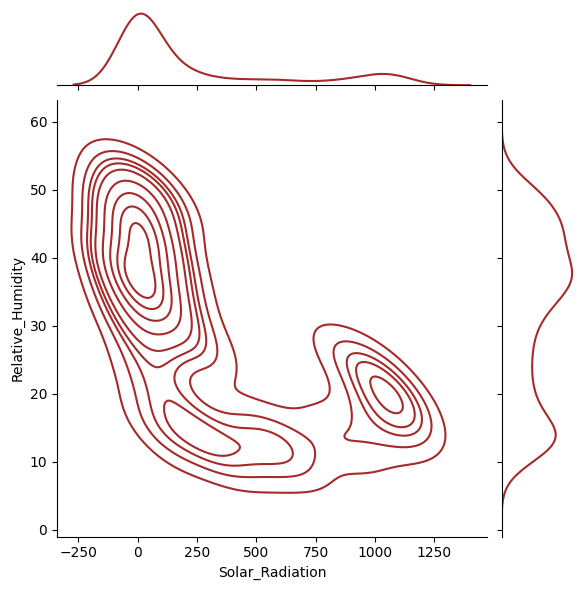

In [ ]:
sns.jointplot(x='Solar_Radiation',y='Relative_Humidity',data = data, kind = 'kde' ,color = 'brown')

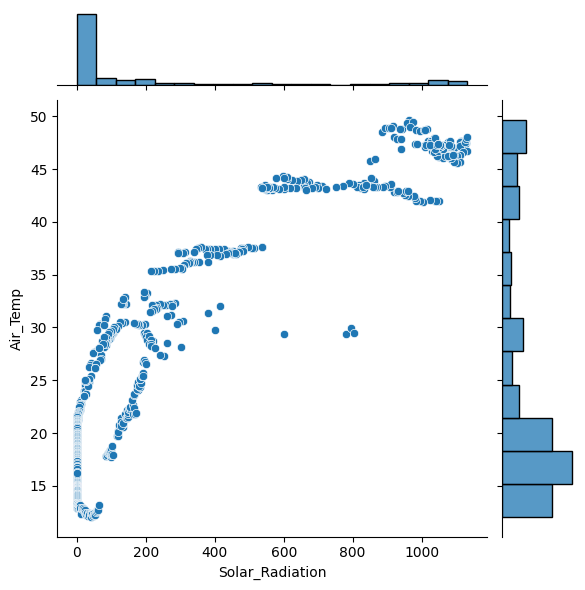

In [ ]:
sns.jointplot(x='Solar_Radiation',y='Air_Temp',data = data)

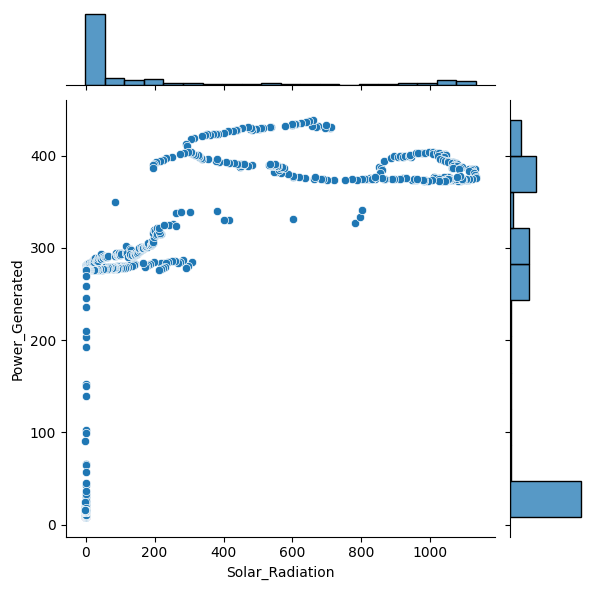

In [ ]:
sns.jointplot(x='Solar_Radiation', y='Power_Generated', data = data)

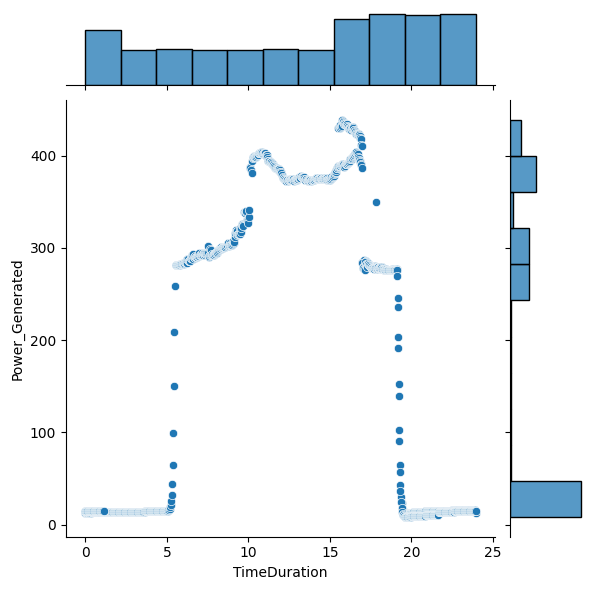

In [ ]:
sns.jointplot(x='TimeDuration', y='Power_Generated', data = data)

**OBSERVATION**

Linear data is data that can be represented on a line graph. This means that there is a clear relationship between the variables and that the graph will be a straight line. Non-linear data, on the other hand, cannot be represented on a line graph.

On observing the above graphs, We came to know that the given dataset is not linear and hence **Non-Linear** models are to be used.

**DRAWING HEATMAP**

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.This makes it simple to remove some more columns , since they directly shows relation between each column. If any of them show 1 , it means that they resemble the same output and can be removed leaving only one column.

**corr()** method is used to calculate the correlation between columns in a data frame.

In [ ]:
data.corr()

,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated,TimeDuration
Air_Temp,1.000000,-0.881522,0.553201,0.332521,0.926546,0.947060,0.939768,0.941827,0.942763,0.944076,0.820737,-0.954264,0.818539,0.139992
Relative_Humidity,-0.881522,1.000000,-0.527177,-0.269776,-0.685155,-0.834347,-0.842189,-0.841937,-0.836790,-0.837487,-0.748393,0.953650,-0.746166,-0.363160
Wind_Speed,0.553201,-0.527177,1.000000,0.197639,0.538768,0.601840,0.604302,0.602146,0.601604,0.601290,0.481086,-0.537450,0.479723,0.031694
Wind_Direction,0.332521,-0.269776,0.197639,1.000000,0.337300,0.317677,0.309743,0.312000,0.314743,0.316612,0.237368,-0.286299,0.236458,-0.058834
Solar_Radiation,0.926546,-0.685155,0.538768,0.337300,1.000000,0.915295,0.901310,0.905277,0.909054,0.909236,0.732484,-0.820339,0.730455,-0.032961
RTD_1,0.947060,-0.834347,0.601840,0.317677,0.915295,1.000000,0.998383,0.998348,0.998685,0.998965,0.805599,-0.924697,0.803235,0.068616
RTD_2,0.939768,-0.842189,0.604302,0.309743,0.901310,0.998383,1.000000,0.999661,0.998975,0.998550,0.803121,-0.926478,0.800739,0.078743
RTD_3,0.941827,-0.841937,0.602146,0.312000,0.905277,0.998348,0.999661,1.000000,0.998783,0.998309,0.803007,-0.928012,0.800618,0.078114
RTD_4,0.942763,-0.836790,0.601604,0.314743,0.909054,0.998685,0.998975,0.998783,1.000000,0.999572,0.809187,-0.923945,0.806862,0.067425
RTD_5,0.944076,-0.837487,0.601290,0.316612,0.909236,0.998965,0.998550,0.998309,0.999572,1.000000,0.811188,-0.924514,0.808869,0.067375


<Axes: >

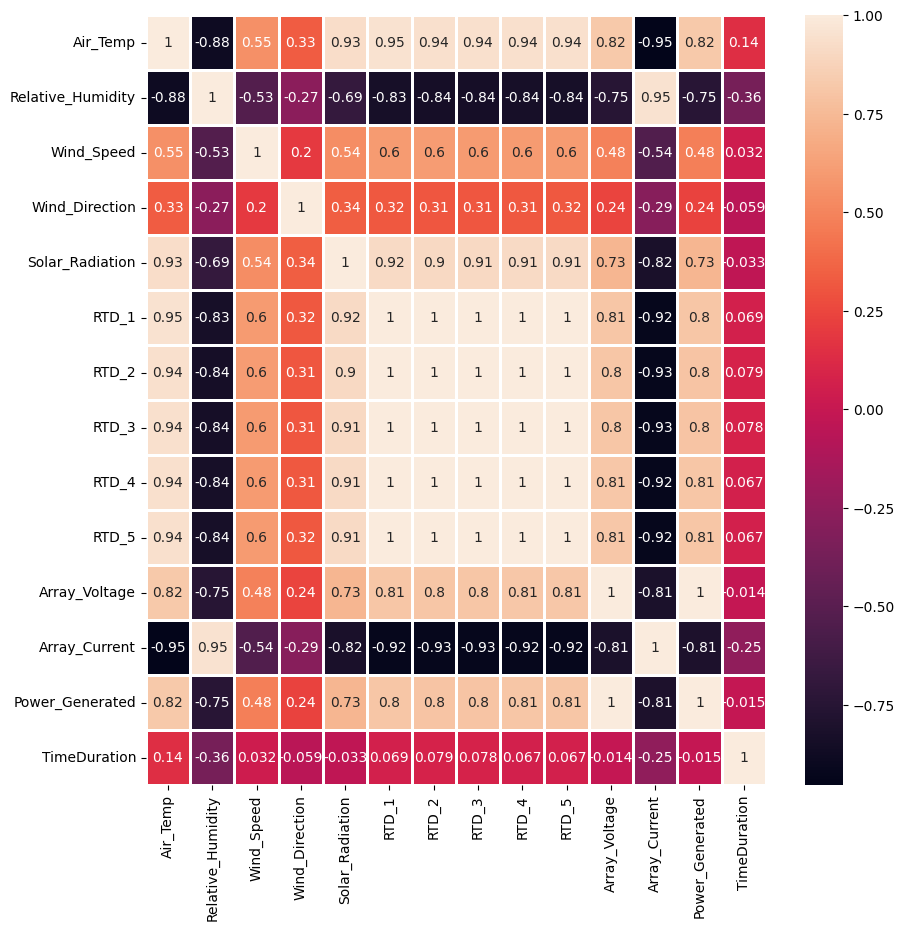

In [ ]:
df = data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(df, annot = True, linewidths=1)

In [ ]:
data = data.drop(['RTD_2','RTD_3','RTD_4','RTD_5'],axis=1)
data.head()

,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,Array_Voltage,Array_Current,Power_Generated,TimeDuration
0,43.349172,12.790256,0.533333,118.786620,707.53384,98.289640,80.178232,5.364869,430.14572,15.533333
1,43.433980,11.468986,1.866667,84.681408,710.46328,98.377480,80.266728,5.366041,430.71452,15.566667
2,43.286580,11.047298,2.866667,40.807156,695.51016,97.868064,80.187416,5.365501,430.24568,15.600000
3,43.523020,12.058292,0.000000,66.390848,696.24472,101.470960,80.727760,5.364512,433.06504,15.633333
4,43.728656,10.722330,2.266667,2.127408,674.05752,101.664240,80.500312,5.365144,431.89576,15.666667


**PLOTTING FINAL HEATMAP**

<Axes: >

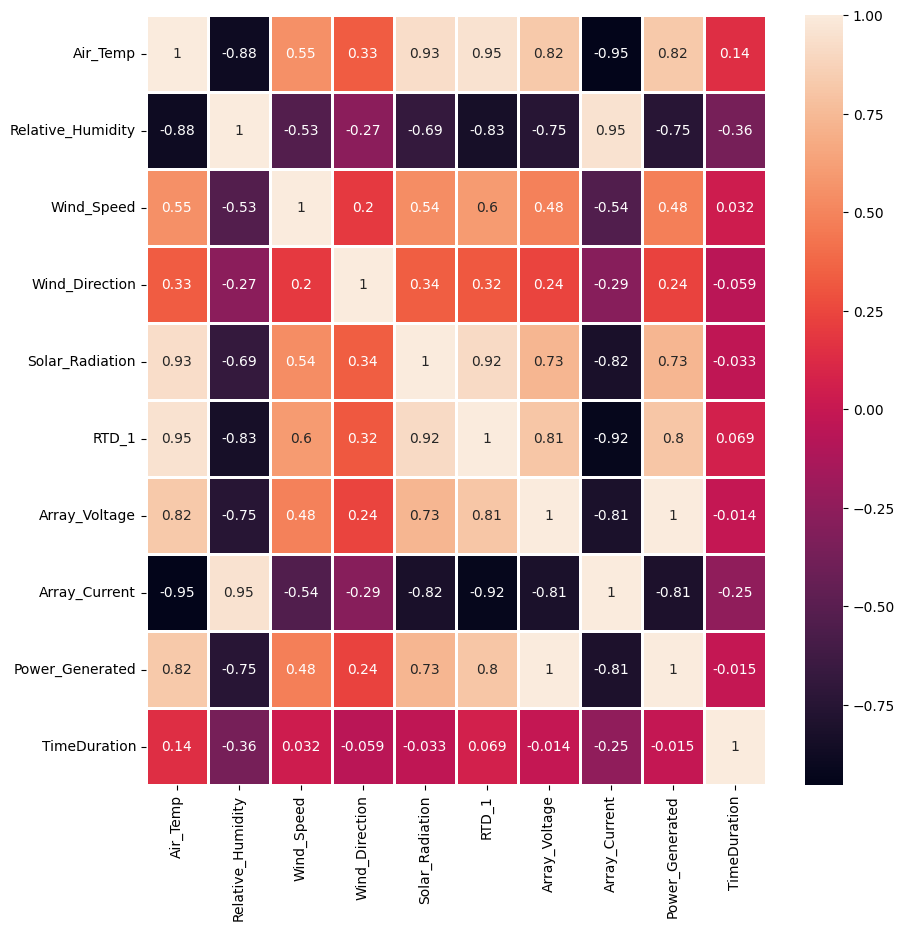

In [ ]:
df= data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(df, annot=True, linewidths=1)

**PLOTTING POWER GENERATION GRAPH**

**pairplot()** function is used to create a matrix of scatter plots and histograms, which shows the relationships between all pairs of variables in a data frame

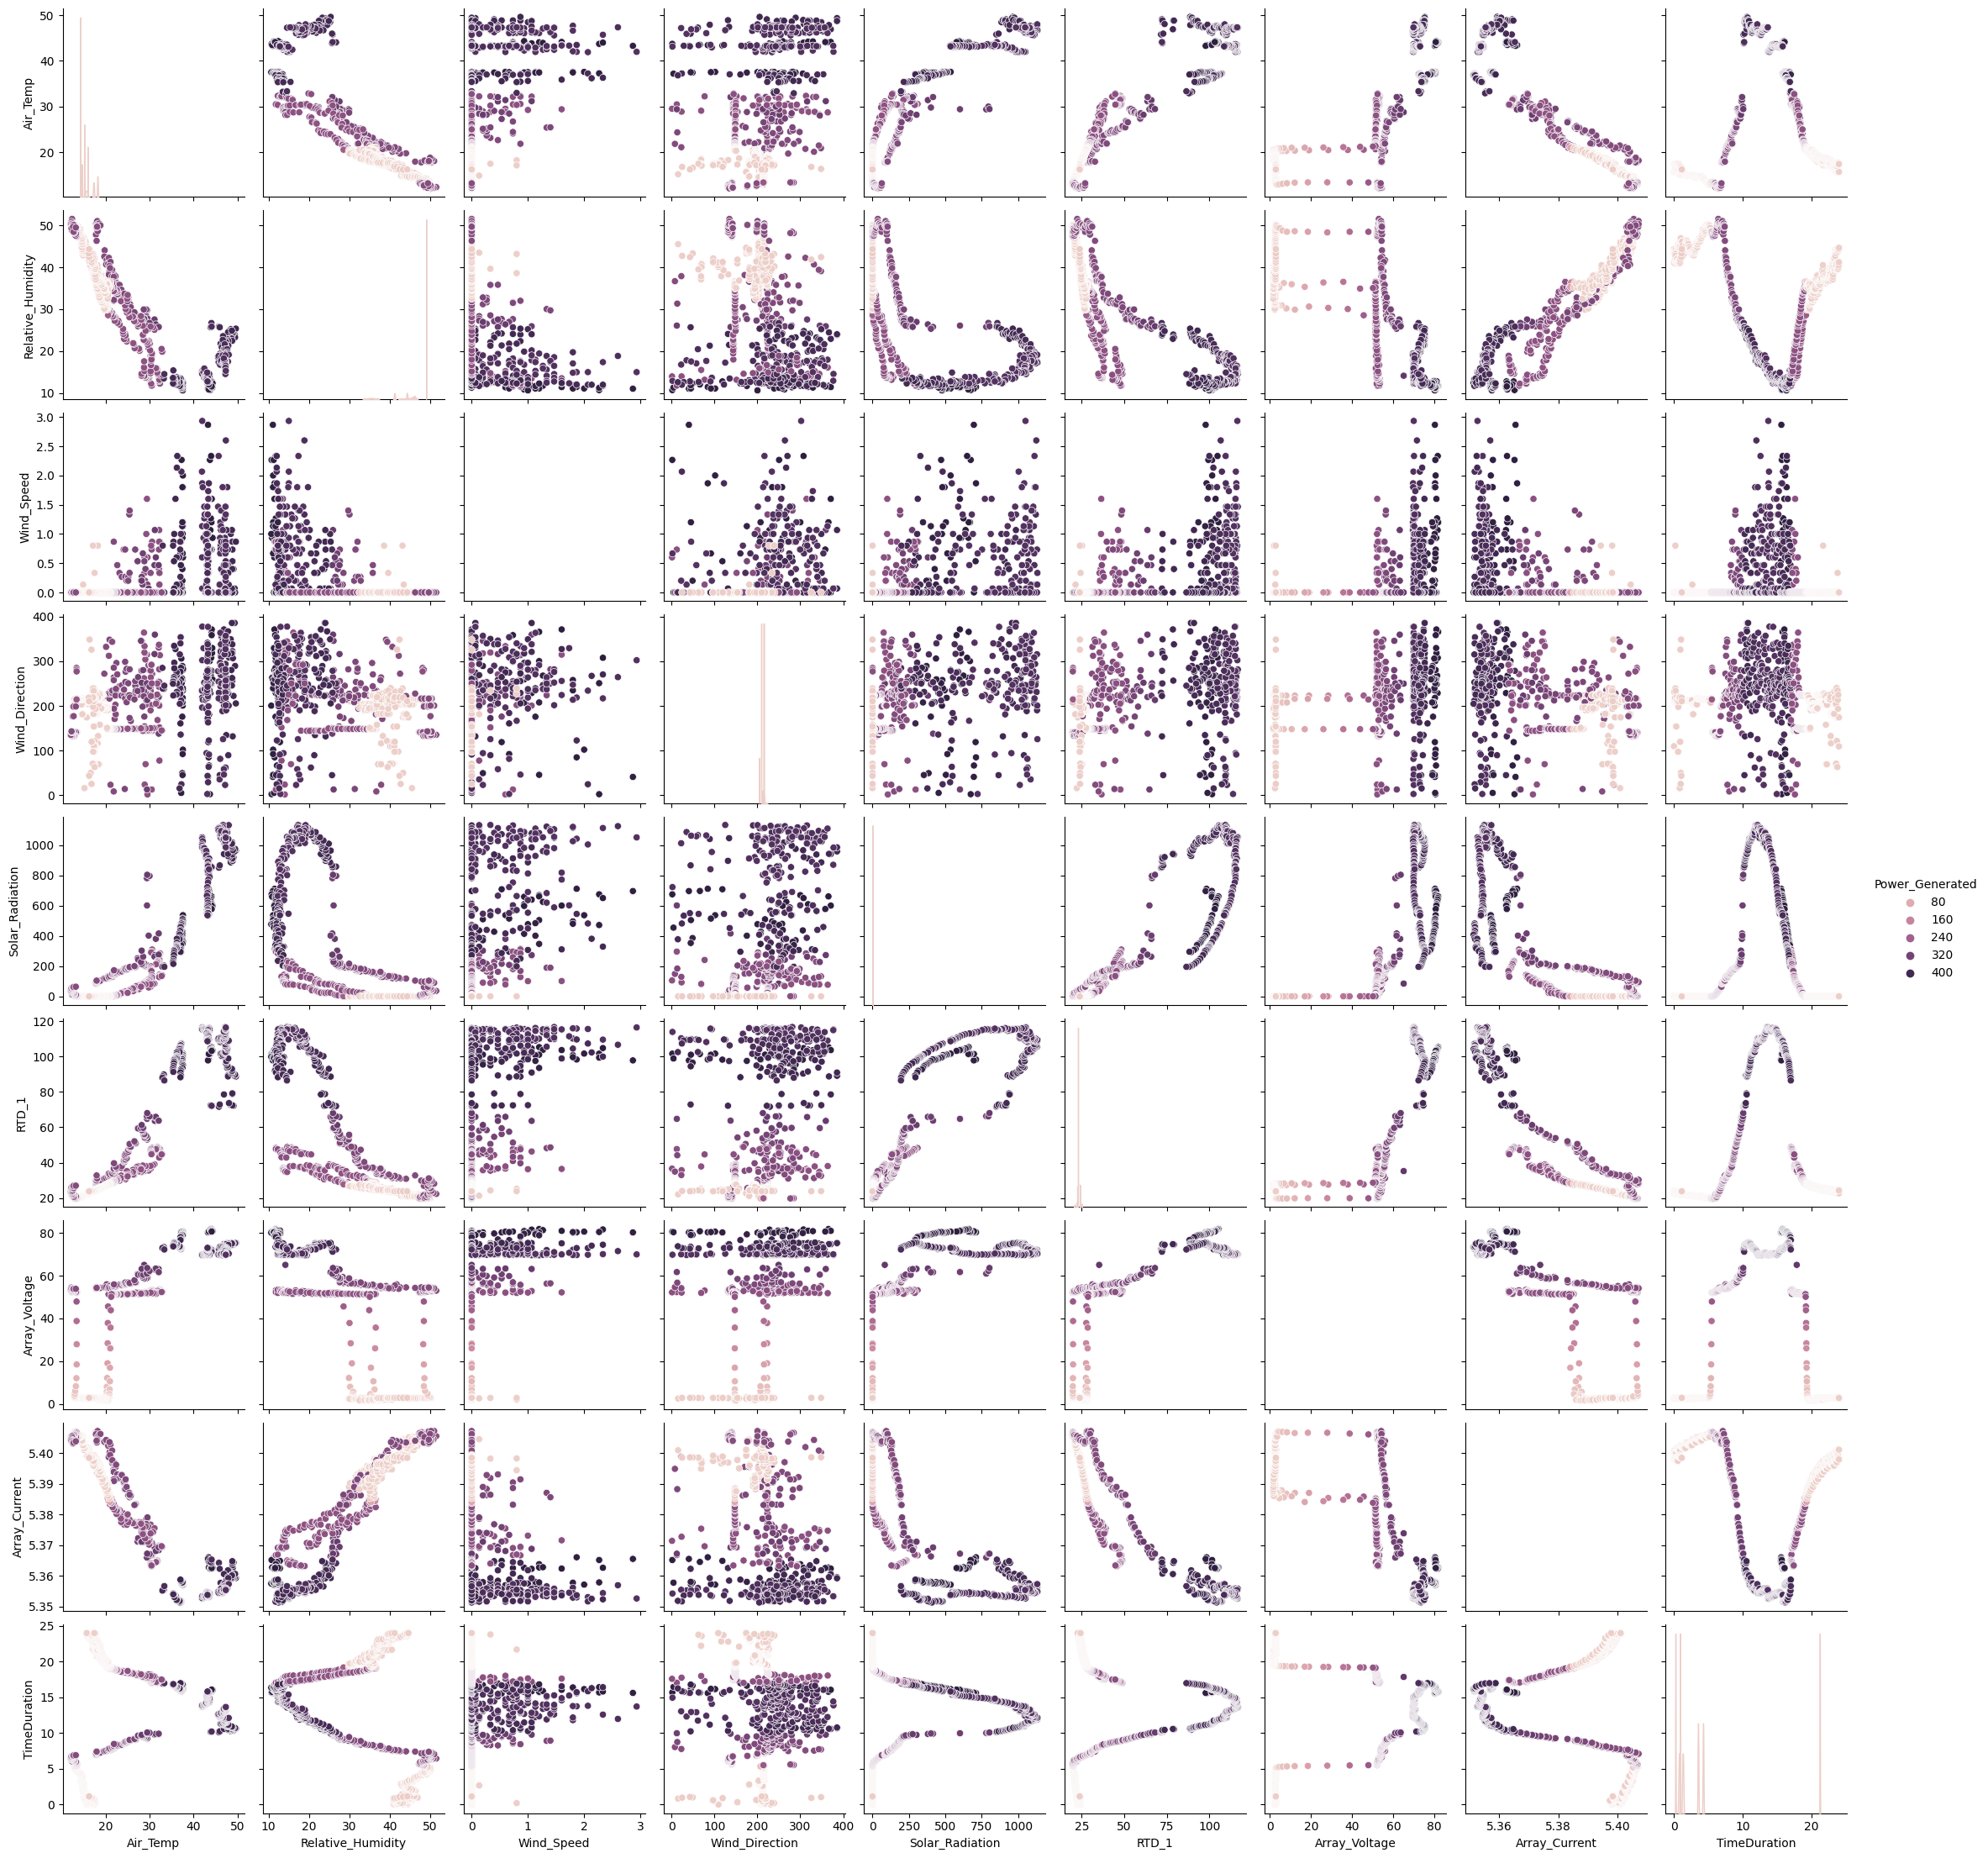

In [ ]:
sns.pairplot(data, hue='Power_Generated')

#**STANDARIZATION OF DATA**

**Data standardization** means your data is internally consistent each of your data sources has the same format and labels. It is an important function, because it provides a structure for creating and maintaining data quality.

**StandardScalar()** is a common preprocessing step in machine learning to transform data so that it has zero mean and unit variance.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

numericals = ['Air_Temp','Relative_Humidity','Wind_Speed','Solar_Radiation','Array_Voltage','Array_Current','Power_Generated']

data[numericals] = scaler.fit_transform(data[numericals])

In [ ]:
data.head()

,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,Array_Voltage,Array_Current,Power_Generated,TimeDuration
0,1.574564,-1.543618,0.814157,118.786620,1.352771,98.289640,1.486584,-1.019787,1.485977,15.533333
1,1.581984,-1.650873,3.883984,84.681408,1.360968,98.377480,1.489439,-0.957215,1.489400,15.566667
2,1.569087,-1.685103,6.186353,40.807156,1.319129,97.868064,1.486880,-0.986045,1.486579,15.600000
3,1.589775,-1.603036,-0.413772,66.390848,1.321185,101.470960,1.504315,-1.038847,1.503541,15.633333
4,1.607768,-1.711483,4.804932,2.127408,1.259106,101.664240,1.496976,-1.005105,1.496506,15.666667


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Air_Temp           1009 non-null   float64
 1   Relative_Humidity  1009 non-null   float64
 2   Wind_Speed         1009 non-null   float64
 3   Wind_Direction     1009 non-null   float64
 4   Solar_Radiation    1009 non-null   float64
 5   RTD_1              1009 non-null   float64
 6   Array_Voltage      1009 non-null   float64
 7   Array_Current      1009 non-null   float64
 8   Power_Generated    1009 non-null   float64
 9   TimeDuration       1009 non-null   float64
dtypes: float64(10)
memory usage: 79.0 KB


#**PREDICTION AND EVALUATION**

**Train/Test** is a method to measure the accuracy of your model. It is called Train/Test because you split the data set into two sets: a training set and a testing set. 80% for training, and 20% for testing. We train the model using the training set.

**RandomForestRegressor()** function is used to create a random forest regression model. Random forest regression is an ensemble machine learning algorithm that combines multiple decision trees to make a prediction. It is a powerful and versatile algorithm that can be used for both classification and regression tasks.

We are going to use both **RandomForestRegressor** and **Train/Test** methods in our model for more accuracy.

## **Power Generation with respect to whole dataset**

In [ ]:
w = data['Power_Generated'].values
print(w)

KeyError: ignored

In [ ]:
y = data.pop('Power_Generated')

In [ ]:
X = data

Spliting data into train and test format:::

In [ ]:
# spliting the data into train and test
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(807, 9) (202, 9) (807,) (202,)


**RandomForestRegressor()** function creates a random forest regression object that can be fit to a data set and used to make predictions on new data.

The **fit()** method is used to train the model on a training set of data.

The **predict()** method is used to make predictions on a test set of data.

In [ ]:
#fit the model
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
#make predictions
y_pred = model.predict(X_test)
print(y_pred)

[ 1.30463009 -1.01009741  0.71955046  0.58238781 -1.00351831  1.21595195
  0.55931017 -1.01728562  0.5961943  -1.00836621 -1.00891862 -1.04452971
 -1.01223454  0.60066736 -1.02183897 -1.0506295   0.5809064   1.19380868
 -1.05029627  1.4855199   1.30929339 -1.03970998 -1.02515546 -1.01235223
  0.70042276  0.59227488  1.15257339  0.58279615 -1.01155398  1.21643134
 -1.00729128 -1.01430124  1.50106959 -1.03931261  0.6443579   0.59937202
 -1.02147279 -1.01233579  1.14960519 -1.01423811 -1.02033179  1.14852355
 -1.05027855 -1.04047765 -1.03865615  1.31761445  0.5968519  -1.01492148
  1.24050651 -1.04133433  1.15065638 -0.90626795 -1.01437722  0.61984585
  0.7318308   0.6714324  -1.04685424  1.24621932 -1.00565404 -1.01338426
 -1.01437057  0.64625524  0.56556457  1.47210977 -1.01492413  1.48647454
 -1.04718644 -1.00607084 -1.01418484 -1.00868924 -1.01357197  0.55851372
 -1.01199523  1.14091265  1.14845407  1.14095354 -1.01439135  0.60327545
 -1.01825882  1.14415436 -1.00981367 -1.01673773  0

**Visual representation of Actual values with respect to predicted values**

**plt.scatter()** function is used to create a scatter plot of two variables.

**%matplotlib inline** command is used to enable the display of matplotlib plots in the notebook output cells

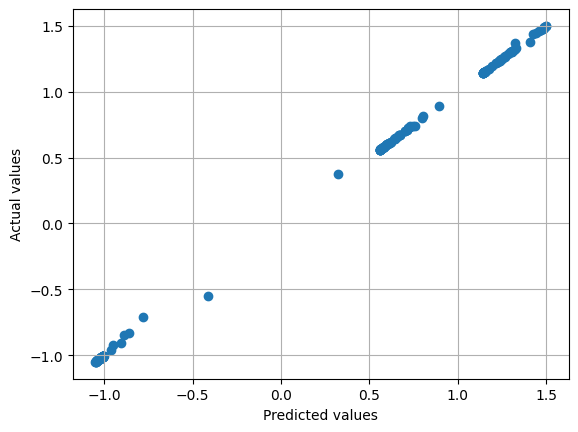

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_pred,y_test)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.grid()
plt.show()

**Evaluating model and finding the error**

**Mean absolute error** gives the mean of absolute difference between model prediction and target value. It serves as an easy-to-understand quantifiable measurement of errors for regression problems.

The closer **MAE** is to 0, the more accurate the model is.

In [ ]:
#evaluate prediction
mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' %mae)

MAE: 0.003


### **Power Generation with respect to Time Duration**

In [ ]:
data.head()

,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,Array_Voltage,Array_Current,TimeDuration
0,1.574564,-1.543618,0.814157,118.786620,1.352771,98.289640,1.486584,-1.019787,15.533333
1,1.581984,-1.650873,3.883984,84.681408,1.360968,98.377480,1.489439,-0.957215,15.566667
2,1.569087,-1.685103,6.186353,40.807156,1.319129,97.868064,1.486880,-0.986045,15.600000
3,1.589775,-1.603036,-0.413772,66.390848,1.321185,101.470960,1.504315,-1.038847,15.633333
4,1.607768,-1.711483,4.804932,2.127408,1.259106,101.664240,1.496976,-1.005105,15.666667


In [ ]:
y = w
X = data['TimeDuration'].values
X = X.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**LinearRegression()** module in Python that is used to create a linear regression model.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[ 0.01095986  0.0105367  -0.00497901  0.02703978  0.04805652  0.0070104
  0.00686935  0.02478295  0.0542628  -0.01189056 -0.01231371  0.04721021
  0.06202066  0.03522079 -0.03685675 -0.00723584 -0.00638953  0.06244381
  0.057507   -0.01626317  0.05976383  0.06004593 -0.03206098 -0.03544623
  0.01575562  0.05990488  0.04636389  0.05919962  0.04481232 -0.02543154
 -0.02712417 -0.02049472 -0.01555791 -0.03643359 -0.0044148  -0.01273687
 -0.02740627 -0.03149678  0.06300802 -0.02430313  0.02971977  0.0252061
  0.05285228  0.06300802  0.05525017  0.0580712   0.04579969 -0.03065046
 -0.01457054 -0.02670101  0.01180617 -0.00201692 -0.01033899  0.01124196
  0.02069244 -0.00568427  0.04594074 -0.00963373 -0.00526112 -0.00624848
 -0.02444418  0.03902919 -0.00342744  0.00715146 -0.02514944  0.03155344
  0.03677236 -0.03008626  0.02901451 -0.03149678 -0.01710948 -0.03276624
  0.04029866 -0.02655996 -0.00229902  0.02633452  0.03564395 -0.03191993
 -0.00751795  0.0216798  -0.01640422  0.05003124 -0.0

In [ ]:
X_test.shape

(202, 1)

To reshape X_test from 2D to 1D array

In [ ]:
X_test=X_test.reshape(-1)
print(X_test)

[12.46666667 12.56666667 16.23333333  8.66666667  3.7        13.4
 13.43333333  9.2         2.23333333 17.86666667 17.96666667  3.9
  0.4         6.73333333 23.76666667 16.76666667 16.56666667  0.3
  1.46666667 18.9         0.93333333  0.86666667 22.63333333 23.43333333
 11.33333333  0.9         4.1         1.06666667  4.46666667 21.06666667
 21.46666667 19.9        18.73333333 23.66666667 16.1        18.06666667
 21.53333333 22.5         0.16666667 20.8         8.03333333  9.1
  2.56666667  0.16666667  2.          1.33333333  4.23333333 22.3
 18.5        21.36666667 12.26666667 15.53333333 17.5        12.4
 10.16666667 16.4         4.2        17.33333333 16.3        16.53333333
 20.83333333  5.83333333 15.86666667 13.36666667 21.          7.6
  6.36666667 22.16666667  8.2        22.5        19.1        22.8
  5.53333333 21.33333333 15.6         8.83333333  6.63333333 22.6
 16.83333333  9.93333333 18.93333333  3.23333333 17.73333333  0.76666667
 17.76666667 21.83333333 18.86666667 12.9

Text(0, 0.5, 'Power Generated')

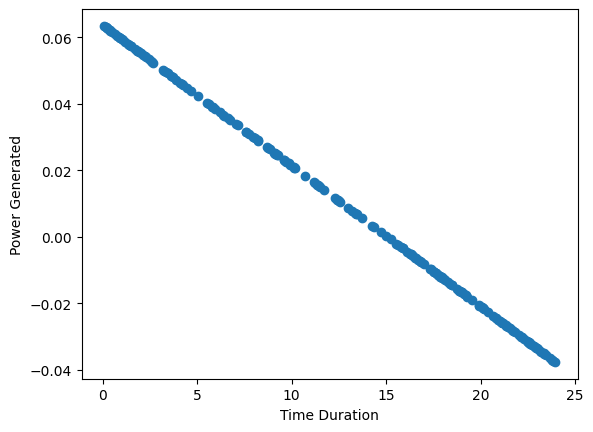

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.scatter(X_test,y_pred)
plt.xlabel('Time Duration')
plt.ylabel('Power Generated')

**max()** function is used to find the highest value in a list.

In [ ]:
highest_value = max(y_pred)
print("The highest predicted value is", highest_value)

The highest predicted value is 0.06343117847547898


**Mean Squared Error (MSE)** is a common metric used to evaluate the performance of a regression model in machine learning. It measures the average of the squared differences between the predicted values and the actual values.

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.9709225630185063


To reshape 1D to 2D array

In [ ]:
X_test=X_test.reshape(-1,1)
X_test.shape

(202, 1)

To divide X_test into 3 groups and finding values of y_pred with respect to this groups

In [ ]:
import numpy as np

# Assuming you have X_test and y_pred as ndarrays
X_test = np.array([X_test])

y_pred = np.array([y_pred])

# Define grouping criteria
criteria = {
    'Group1': [0 >= 8],
    'Group2': [8 >= 16],
    'Group3': [16 >= 24]
}

# Create a dictionary to store y_pred values for each group
y_pred_groups = {group: [] for group in criteria}

# Assign y_pred values to the corresponding groups
for x, y in zip(X_test, y_pred):
    for group, values in criteria.items():
        if x[0] in values:
            y_pred_groups[group].append(y_pred)
            break  # Exit the inner loop after assigning the group

# Print the y_pred values for each group
for group, values in y_pred_groups.items():
    print(f"Group: {group}, y_pred values: {y_pred_group}")

Group: Group1, y_pred values: [[[[[ 0.01095986  0.0105367  -0.00497901  0.02703978  0.04805652
      0.0070104   0.00686935  0.02478295  0.0542628  -0.01189056
     -0.01231371  0.04721021  0.06202066  0.03522079 -0.03685675
     -0.00723584 -0.00638953  0.06244381  0.057507   -0.01626317
      0.05976383  0.06004593 -0.03206098 -0.03544623  0.01575562
      0.05990488  0.04636389  0.05919962  0.04481232 -0.02543154
     -0.02712417 -0.02049472 -0.01555791 -0.03643359 -0.0044148
     -0.01273687 -0.02740627 -0.03149678  0.06300802 -0.02430313
      0.02971977  0.0252061   0.05285228  0.06300802  0.05525017
      0.0580712   0.04579969 -0.03065046 -0.01457054 -0.02670101
      0.01180617 -0.00201692 -0.01033899  0.01124196  0.02069244
     -0.00568427  0.04594074 -0.00963373 -0.00526112 -0.00624848
     -0.02444418  0.03902919 -0.00342744  0.00715146 -0.02514944
      0.03155344  0.03677236 -0.03008626  0.02901451 -0.03149678
     -0.01710948 -0.03276624  0.04029866 -0.02655996 -0.00229

Visual representation of values of y_pred with respect to groups we formed. It is a bar graph

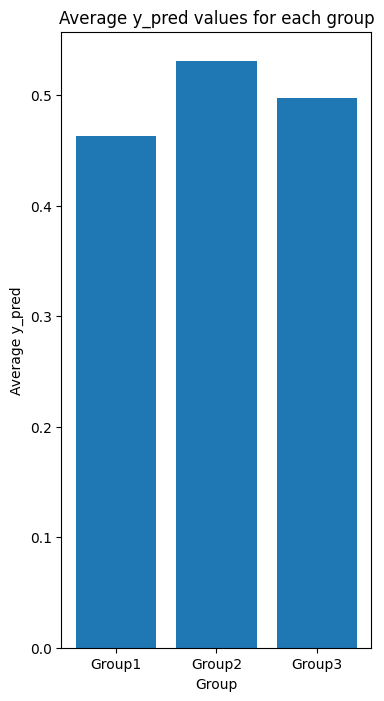

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the y_pred_groups dictionary with group names as keys

# Generate random y_pred values for each group (example values)
for group in y_pred_groups:
    # Generate random values between 0 and 1
    values = np.random.rand(100)
    # Assign the values to the group in the y_pred_groups dictionary
    y_pred_groups[group] = values

# Extract group names and y_pred values
group_names = list(y_pred_groups.keys())
y_pred_values = list(y_pred_groups.values())

# Calculate the average y_pred value for each group
avg_y_pred = [np.mean(values) for values in y_pred_values]

# Plot the bar graph
plt.figure(figsize=(4,8))
plt.bar(group_names, avg_y_pred)
plt.xlabel('Group')
plt.ylabel('Average y_pred')
plt.title('Average y_pred values for each group')
plt.show()